In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Pothole_Detection/dataset.zip', '/content/Pothole_Detection')

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17055, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 17055 (delta 17), reused 16 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17055/17055), 15.68 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (11711/11711), done.
/content/yolov5


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 12.2 MB/s eta 0:00:00


In [ ]:
with open('data.yaml', 'w') as f:
    f.write(
        'train: /content/Pothole_Detection/dataset/train/images\n'
        'val: /content/Pothole_Detection/dataset/val/images\n'
        'nc: 1\n'
        'names: ["pothole"]\n'
    )

In [ ]:
!WANDB_MODE="dryrun" python train.py --img 416 --batch 16 --epochs 20 --data data.yaml --weights yolov5s.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-20 00:06:42.312071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 00:06:42.337233: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 00:06:42.344705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return the number of available GPUs

False
0


In [ ]:
!python export.py --weights runs/train/exp/weights/best.pt --img 416 --batch 1 --device cpu

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-385-gb968b2d7 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 10647, 6) (13.7 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.5s, saved as runs/train/exp/weights/best.torchscript (27.1 MB)

Export complete (3.3s)
Results saved to /content/yolov5/runs/train/exp/weights
Detect:          python detect.py --weights runs/train/exp/weights/best.torchscript 
Validate:       

In [ ]:
!pwd

/content/yolov5


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.torchscript --img 416 --conf 0.25 --source '/content/Pothole_Detection/dataset/val/images/101.jpg'

detect: weights=['runs/train/exp/weights/best.torchscript'], source=/content/Pothole_Detection/dataset/val/images/101.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-385-gb968b2d7 Python-3.10.12 torch-2.5.1+cu121 CPU

Loading runs/train/exp/weights/best.torchscript for TorchScript inference...
image 1/1 /content/Pothole_Detection/dataset/val/images/101.jpg: 416x416 1 pothole, 586.2ms
Speed: 2.7ms pre-process, 586.2ms inference, 2.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


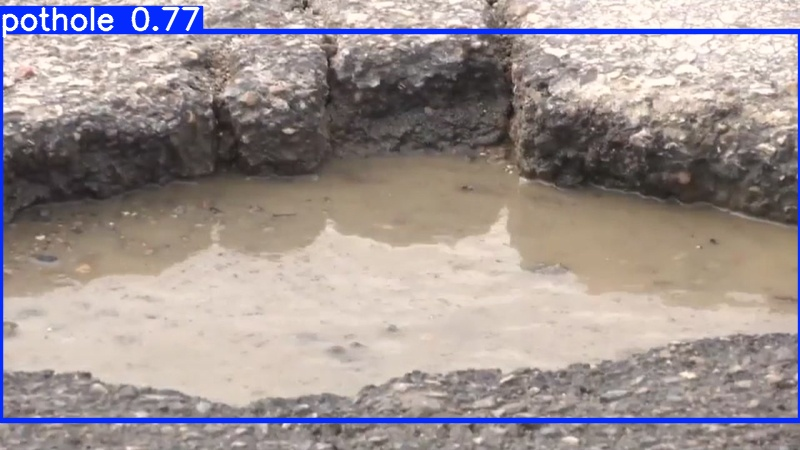

In [ ]:
from IPython.display import Image
Image(filename='/content/yolov5/runs/detect/exp/101.jpg')

In [ ]:
import shutil
shutil.make_archive('/content/drive/MyDrive/Pothole_Detection_backup', 'zip', '/content/drive/MyDrive/Pothole_Detection')

'/content/drive/MyDrive/Pothole_Detection_backup.zip'

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Pothole_Detection_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Zip trained model weights
shutil.make_archive('/content/best_model', 'zip', '/content/yolov5/runs/train/exp/weights', 'best.torchscript')

'/content/best_model.zip'

In [ ]:
# Zip YOLOv5 repository if needed
shutil.make_archive('/content/yolov5_repo', 'zip', '/content/yolov5')

'/content/yolov5_repo.zip'

In [ ]:
from google.colab import files

# Download trained model weights
files.download('/content/best_model.zip')

# Download YOLOv5 repository if needed
files.download('/content/yolov5_repo.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
shutil.make_archive('/content/drive/MyDrive/yolov5', 'zip', '/content/drive/MyDrive/yolov5')

'/content/drive/MyDrive/yolov5.zip'

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/yolov5.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>